# Prediction with a pre-trained model (Keras)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from PIL import Image

%matplotlib inline

from tensorflow.keras.models import load_model
# Import only the custom function you need, not everything with '*'
from unet3_keras import * #cross_entropy_balanced

2025-08-02 14:58:04.913373: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1754139484.933667   35383 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1754139484.939645   35383 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1754139484.957372   35383 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1754139484.957403   35383 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1754139484.957405   35383 computation_placer.cc:177] computation placer alr

In [2]:
# load json and create model 
import os
try:
    ROOT_DIR = os.path.dirname(os.path.abspath(__file__))  # for .py scripts
except NameError:
    ROOT_DIR = os.getcwd()  # for Jupyter notebooks

model_path = os.path.join(ROOT_DIR, "model", "unet_keras_model_200pairs_25epochs_2025-08-01_09-19-32.keras")

custom_objects = {'cross_entropy_balanced': cross_entropy_balanced}
loaded_model = load_model(model_path, custom_objects=custom_objects)

print("Loaded model from disk")
loaded_model.summary()

# training image dimensions
n1, n2, n3 = 128, 128, 128

I0000 00:00:1754139487.224764   35383 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 21746 MB memory:  -> device: 0, name: NVIDIA RTX A5000, pci bus id: 0000:41:00.0, compute capability: 8.6


Loaded model from disk


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 128, 1)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d (Conv3D)     │ (None, 128, 128,  │        448 │ input_layer[0][0] │
│                     │ 128, 16)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_1 (Conv3D)   │ (None, 128, 128,  │      6,928 │ conv3d[0][0]      │
│                     │ 128, 16)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling3d       │ (None, 64, 64,    │          0 │ conv3d_1[0][0]    │
│ (MaxPooling3D)      │ 64, 16)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_2 (Conv3D)   │ (None, 64, 64,    │     13,856 │ max_pooling3d[0]… │
│                     │ 64, 32)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_3 (Conv3D)   │ (None, 64, 64,    │     27,680 │ conv3d_2[0][0]    │
│                     │ 64, 32)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling3d_1     │ (None, 32, 32,    │          0 │ conv3d_3[0][0]    │
│ (MaxPooling3D)      │ 32, 32)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_4 (Conv3D)   │ (None, 32, 32,    │     55,360 │ max_pooling3d_1[… │
│                     │ 32, 64)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_5 (Conv3D)   │ (None, 32, 32,    │    110,656 │ conv3d_4[0][0]    │
│                     │ 32, 64)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling3d_2     │ (None, 16, 16,    │          0 │ conv3d_5[0][0]    │
│ (MaxPooling3D)      │ 16, 64)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_6 (Conv3D)   │ (None, 16, 16,    │    221,312 │ max_pooling3d_2[… │
│                     │ 16, 128)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_7 (Conv3D)   │ (None, 16, 16,    │    442,496 │ conv3d_6[0][0]    │
│                     │ 16, 128)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ up_sampling3d       │ (None, 32, 32,    │          0 │ conv3d_7[0][0]    │
│ (UpSampling3D)      │ 32, 128)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 32, 32,    │          0 │ up_sampling3d[0]… │
│ (Concatenate)       │ 32, 192)          │            │ conv3d_5[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_8 (Conv3D)   │ (None, 32, 32,    │    331,840 │ concatenate[0][0] │
│                     │ 32, 64)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_9 (Conv3D)   │ (None, 32, 32,    │    110,656 │ conv3d_8[0][0]    │
│                     │ 32, 64)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ up_sampling3d_1     │ (None, 64, 64,    │          0 │ conv3d_9[0][0]  

 Total params: 4,378,757 (16.70 MB)

 Trainable params: 1,459,585 (5.57 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,919,172 (11.14 MB)

In [3]:
def getMask(os):
    sc = np.zeros((n1,n2,n3),dtype=np.single)
    sc = sc+1
    sp = np.zeros((os),dtype=np.single)
    sig = os/4
    sig = 0.5/(sig*sig)
    for ks in range(os):
        ds = ks-os+1
        sp[ks] = np.exp(-ds*ds*sig)
    for k1 in range(os):
        for k2 in range(n2):
            for k3 in range(n3):
                sc[k1][k2][k3]=sp[k1]
                sc[n1-k1-1][k2][k3]=sp[k1]
    for k1 in range(n1):
        for k2 in range(os):
            for k3 in range(n3):
                sc[k1][k2][k3]=sp[k2]
                sc[k1][n3-k2-1][k3]=sp[k2]
    for k1 in range(n1):
        for k2 in range(n2):
            for k3 in range(os):
                sc[k1][k2][k3]=sp[k3]
                sc[k1][k2][n3-k3-1]=sp[k3]
    return sc

====================================================================== prediction test on a training image

I0000 00:00:1754139489.060048   35537 service.cc:152] XLA service 0x73ad6800a690 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1754139489.060104   35537 service.cc:160]   StreamExecutor device (0): NVIDIA RTX A5000, Compute Capability 8.6
2025-08-02 14:58:09.087172: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1754139489.154852   35537 cuda_dnn.cc:529] Loaded cuDNN version 90800
2025-08-02 14:58:09.548215: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-08-02 14:58:09.691963: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please i

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


I0000 00:00:1754139492.403521   35537 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


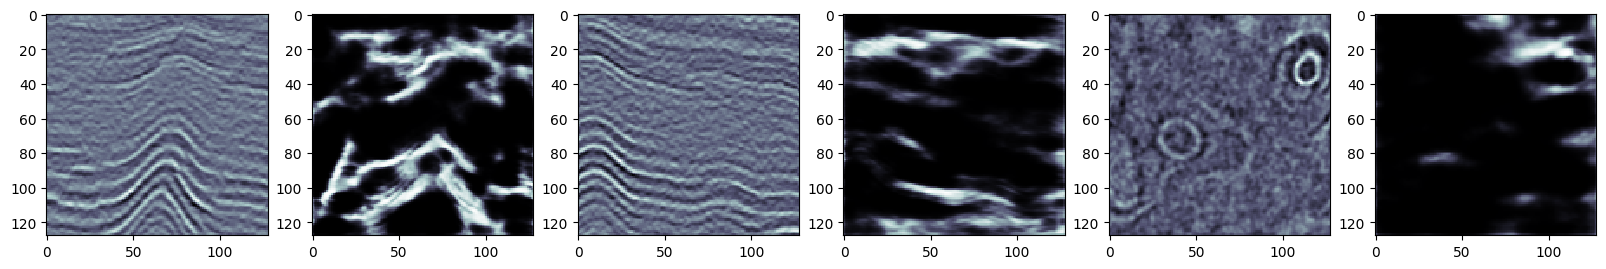

In [4]:

gx,m1,m2,m3 = np.fromfile("/home/roderickperez/DS_PROJECTS/faultSeg/data/data_from_Wu/train/seis/8.dat",dtype=np.single),128,128,128
# Use Z-score normalization to match training
gm = np.mean(gx)
gs = np.std(gx)
gx = (gx - gm) / gs

k = 50
x = np.reshape(gx,(1,n1,n2,n3,1))
Y = loaded_model.predict(x,verbose=1)
fig = plt.figure(figsize=(20,20))
#inline slice
k1 = 50
plt.subplot(1, 6, 1)
imgplot1 = plt.imshow(np.transpose(x[0,k,:,:,0]),cmap=plt.cm.bone,interpolation='nearest',aspect=1)
plt.subplot(1, 6, 2)
imgplot2 = plt.imshow(np.transpose(Y[0,k,:,:,0]),cmap=plt.cm.bone,interpolation='nearest',aspect=1)
#xline slice
k2 = 110
plt.subplot(1, 6, 3)
imgplot1 = plt.imshow(np.transpose(x[0,:,k2,:,0]),cmap=plt.cm.bone,interpolation='nearest',aspect=1)
plt.subplot(1, 6, 4)
imgplot2 = plt.imshow(np.transpose(Y[0,:,k2,:,0]),cmap=plt.cm.bone,interpolation='nearest',aspect=1)

#time slice
k3 = 60
plt.subplot(1, 6, 5)
imgplot1 = plt.imshow(np.transpose(x[0,:,:,k3,0]),cmap=plt.cm.bone,interpolation='nearest',aspect=1)
plt.subplot(1, 6, 6)
imgplot2 = plt.imshow(np.transpose(Y[0,:,:,k3,0]),cmap=plt.cm.bone,interpolation='nearest',aspect=1)

====================================================================== prediction test on a field seismic image extracted from the Netherlands off-shore F3 block seismic data

In [5]:
#a 3d array of gx[m1][m2][m3], please make sure the dimensions are correct!!!
#we strongly suggest to gain the seismic image before input it to the faultSeg!!!
dat_file_path = os.path.abspath(os.path.join(ROOT_DIR, "..", "data", "data_from_Wu", "prediction", "f3d", "gxl.dat"))
gx,m1,m2,m3 = np.fromfile(dat_file_path, dtype=np.single), 512, 384, 128
overlap = 12 #overlap width
c1 = np.round((m1+overlap)/(n1-overlap)+0.5)
c2 = np.round((m2+overlap)/(n2-overlap)+0.5)
c3 = np.round((m3+overlap)/(n3-overlap)+0.5)
c1 = int(c1)
c2 = int(c2)
c3 = int(c3)
p1 = (n1-overlap)*c1+overlap
p2 = (n2-overlap)*c2+overlap
p3 = (n3-overlap)*c3+overlap
gx = np.reshape(gx,(m1,m2,m3))
gp = np.zeros((p1,p2,p3),dtype=np.single)
gy = np.zeros((p1,p2,p3),dtype=np.single)
mk = np.zeros((p1,p2,p3),dtype=np.single)
gs = np.zeros((1,n1,n2,n3,1),dtype=np.single)
gp[0:m1,0:m2,0:m3]=gx
sc = getMask(overlap)
for k1 in range(c1):
    for k2 in range(c2):
        for k3 in range(c3):
            b1 = k1*n1-k1*overlap
            e1 = b1+n1
            b2 = k2*n2-k2*overlap
            e2 = b2+n2
            b3 = k3*n3-k3*overlap
            e3 = b3+n3
            gs[0,:,:,:,0]=gp[b1:e1,b2:e2,b3:e3]
            # Use Z-score normalization FOR EACH PATCH to match training
            gm = np.mean(gs)
            gs_std = np.std(gs)
            # Avoid division by zero for blank patches
            if gs_std > 1e-6:
                gs = (gs - gm) / gs_std
            else:
                gs = gs - gm

            Y = loaded_model.predict(gs,verbose=1)
            Y = np.array(Y)
            gy[b1:e1,b2:e2,b3:e3]= gy[b1:e1,b2:e2,b3:e3]+Y[0,:,:,:,0]*sc
            mk[b1:e1,b2:e2,b3:e3]= mk[b1:e1,b2:e2,b3:e3]+sc
gy = gy/mk
gy = gy[0:m1,0:m2,0:m3]
output_dir = os.path.join(ROOT_DIR, "faultSeg_Wu_2019_Keras", "data_from_Wu", "prediction", "f3d")
os.makedirs(output_dir, exist_ok=True)
gy.tofile(os.path.join(output_dir, "fp.dat"), format="%4")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━

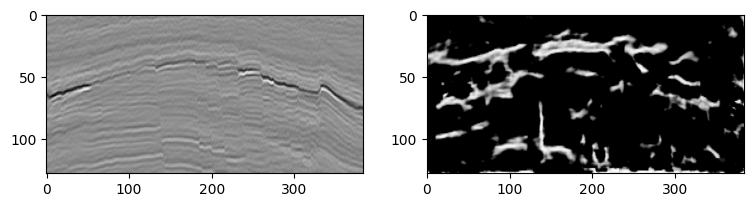

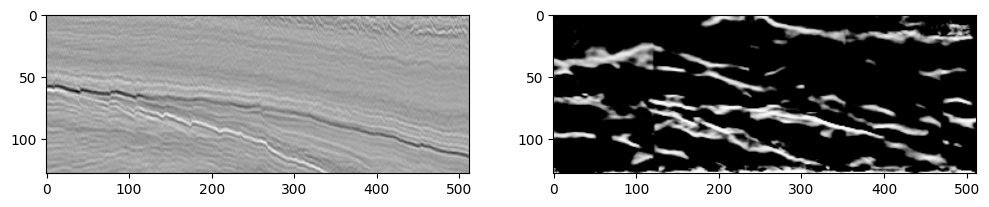

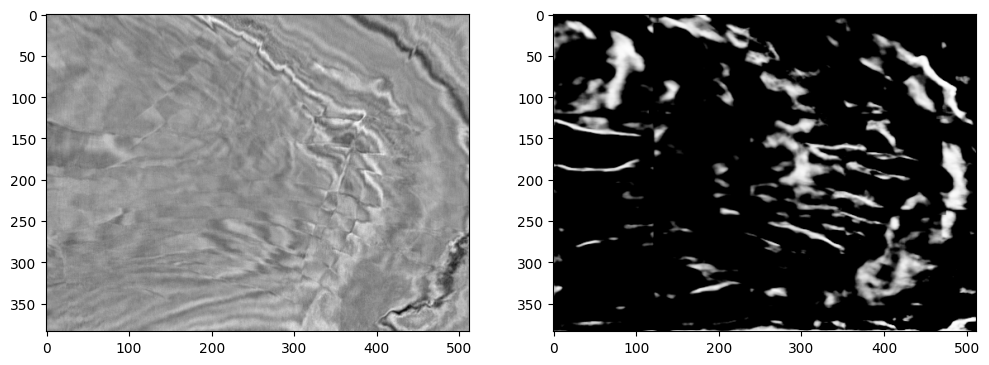

In [7]:
gx,m1,m2,m3 = np.fromfile("/home/roderickperez/DS_PROJECTS/faultSeg/data/data_from_Wu/prediction/f3d/gxl.dat",dtype=np.single),512,384,128
output_dir = "/home/roderickperez/DS_PROJECTS/faultSeg/faultSeg_Wu_2019_Keras/data_from_Wu/prediction/f3d"
import os
os.makedirs(output_dir, exist_ok=True)
gy.tofile(os.path.join(output_dir, "fp.dat"), format="%4")
gx = np.reshape(gx,(m1,m2,m3))
gy = np.reshape(gy,(m1,m2,m3))

k1,k2,k3 = 29,29,99
gx1 = np.transpose(gx[k1,:,:])
gy1 = np.transpose(gy[k1,:,:])
gx2 = np.transpose(gx[:,k2,:])
gy2 = np.transpose(gy[:,k2,:])
gx3 = np.transpose(gx[:,:,k3])
gy3 = np.transpose(gy[:,:,k3])

#xline slice
fig = plt.figure(figsize=(9,9))
p1 = plt.subplot(1, 2, 1)
p1.imshow(gx1,aspect=1.5,cmap=plt.cm.gray)
p2 = plt.subplot(1,2,2)
p2.imshow(gy1,aspect=1.5,interpolation="bilinear",vmin=0.4,vmax=1.0,cmap=plt.cm.gray)

#inline slice
fig = plt.figure(figsize=(12,12))
p1 = plt.subplot(1, 2, 1)
p1.imshow(gx2,aspect=1.5,cmap=plt.cm.gray)
p2 = plt.subplot(1,2,2)
p2.imshow(gy2,aspect=1.5,interpolation="bilinear",vmin=0.4,vmax=1.0,cmap=plt.cm.gray)

#time slice
fig = plt.figure(figsize=(12,12))
p1 = plt.subplot(1, 2, 1)
p1.imshow(gx3,cmap=plt.cm.gray)
p2 = plt.subplot(1,2,2)
p2.imshow(gy3,interpolation="bilinear",vmin=0.4,vmax=1.0,cmap=plt.cm.gray)